<a href="https://colab.research.google.com/github/pranjalsrivastava88/AggiesHackathon/blob/main/State_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df = pd.read_csv("/content/gdrive/MyDrive/Files/combined_data.csv")
df = df.drop(columns = ["Unnamed: 0"])

# State Clustering

In [3]:
def data_preprocessing(df, year):
    kmeans_df = df[(df["year"] == year) & (df["State"] != "Puerto Rico")]
    kmeans_df = kmeans_df[["State", 
                          "New Diagnoses White Rate", 
                          "New Diagnoses Black Rate", 
                          "New Diagnoses Hispanic Rate", 
                          "New Diagnoses Asian Rate", 
                          "New Diagnoses American Indian/Alaska Native Rate", 
                          "New Diagnoses Native Hawaiian/Other Pacific Islander Rate"]].set_index("State", drop = True)
    return kmeans_df

In [4]:
def plot_kmeans_clusters(kmeans_df, n_clusters, x_axis, y_axis, states_to_label = []):
    kmeans_df_scaled = (kmeans_df - kmeans_df.mean()) / kmeans_df.std()
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(kmeans_df_scaled)
    kmeans_df_plot = kmeans_df.loc[:, [x_axis, y_axis]]
    kmeans_df_plot.loc[:, "Cluster"] = kmeans.labels_
    plt.figure(figsize = (8, 8))
    sns.scatterplot(
        x = x_axis, 
        y = y_axis, 
        hue = "Cluster",
        palette = "bright",
        data = kmeans_df_plot
        )
    for state in states_to_label:
        plt.text(x = kmeans_df_plot[x_axis][state] + 0.05, 
                 y = kmeans_df_plot[y_axis][state] + 0.05, 
                 s = state, 
                 fontdict = dict(color = 'black', size = 8)
                 )

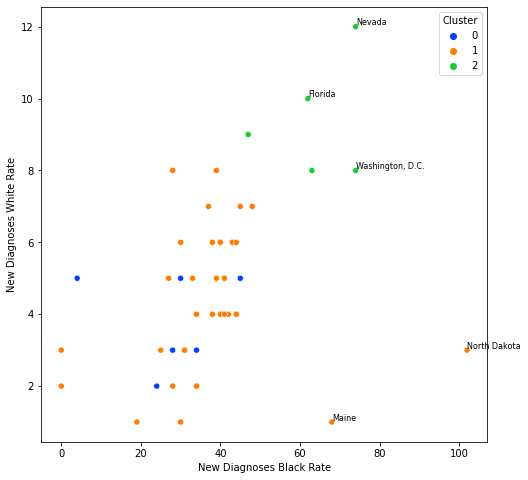

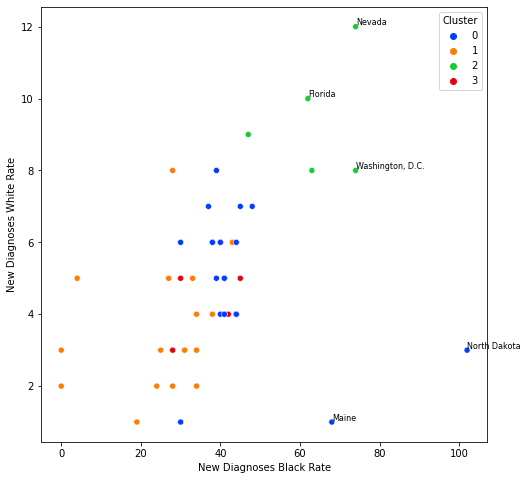

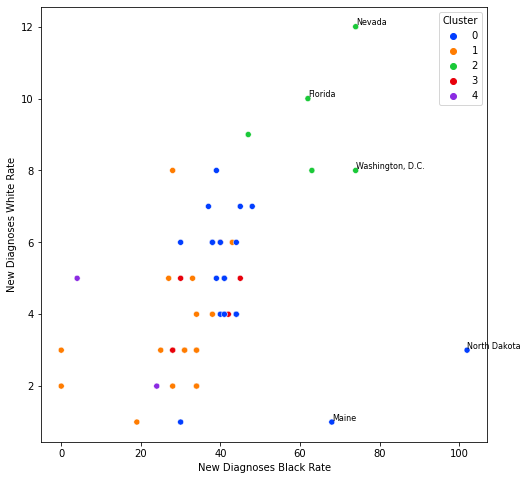

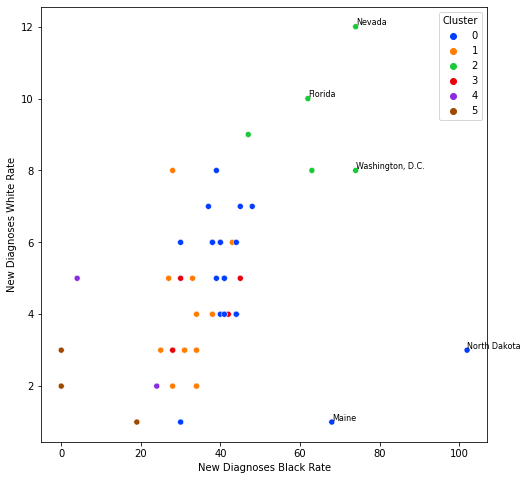

In [5]:
# choosing the optimal number of clusters
data2019 = data_preprocessing(df, 2019)
for n_clusters in range(3, 7):
    plot_kmeans_clusters(data2019, n_clusters, "New Diagnoses Black Rate", "New Diagnoses White Rate", 
                         ["Washington, D.C.", "North Dakota", "Maine", "Florida", "Nevada"])

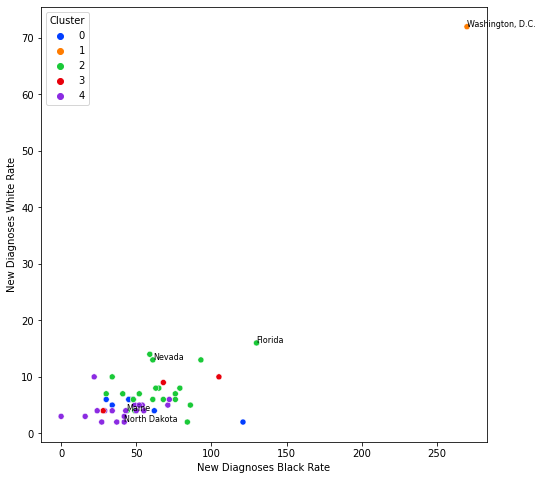

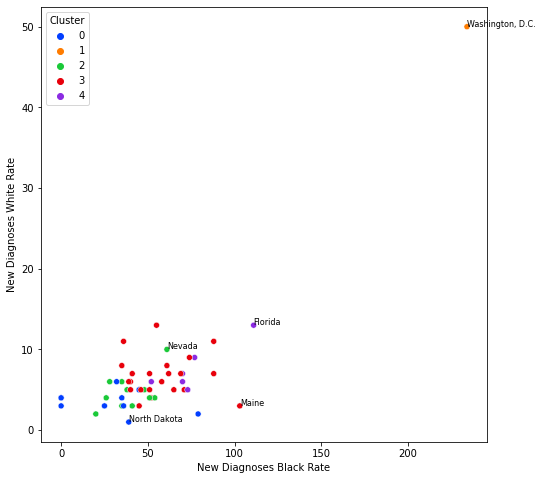

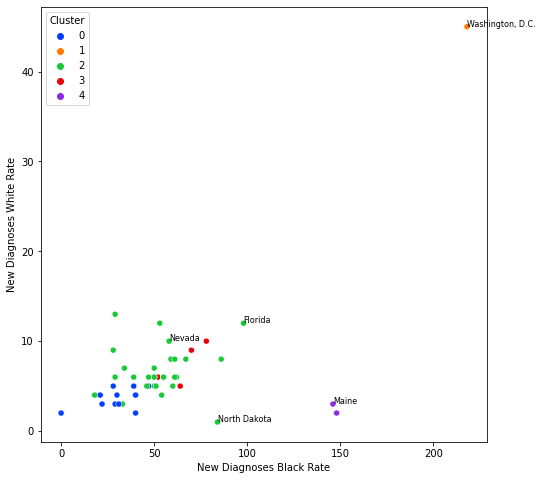

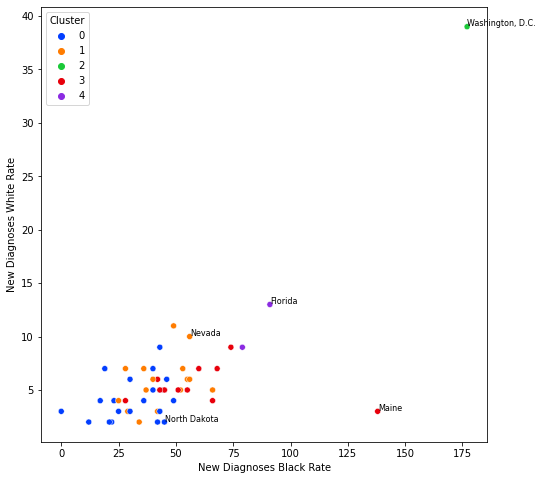

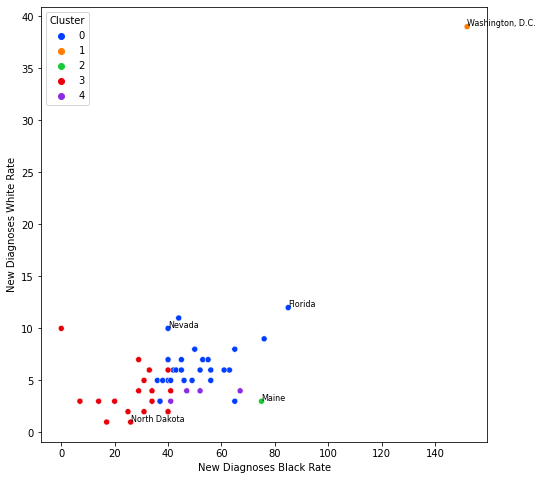

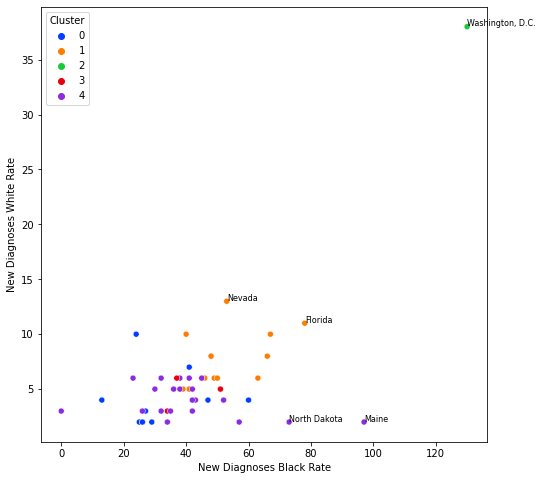

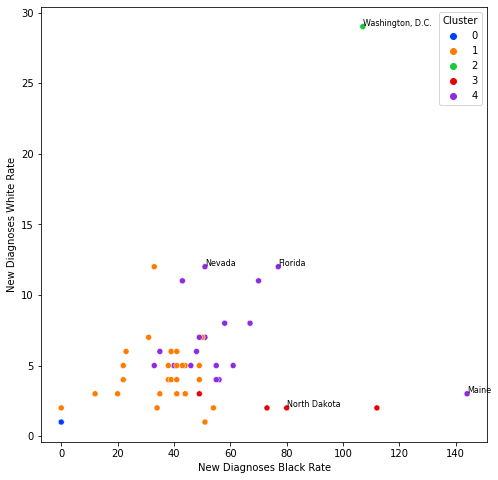

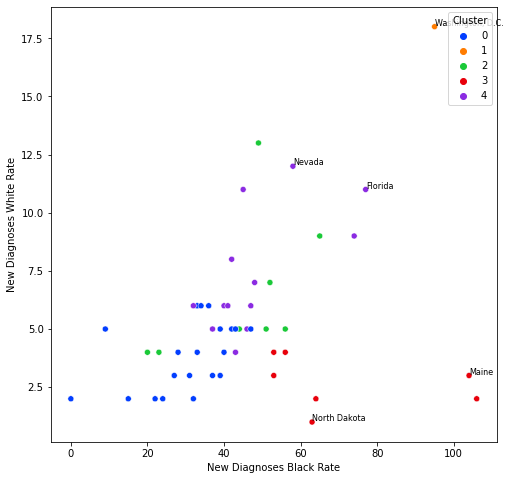

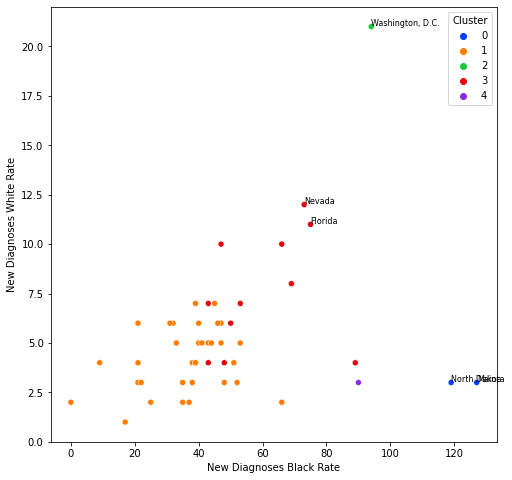

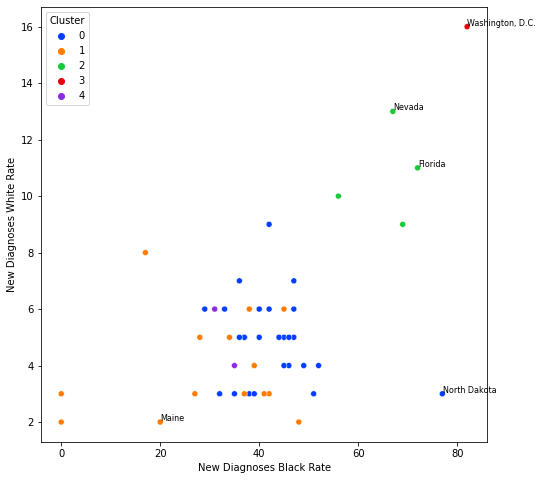

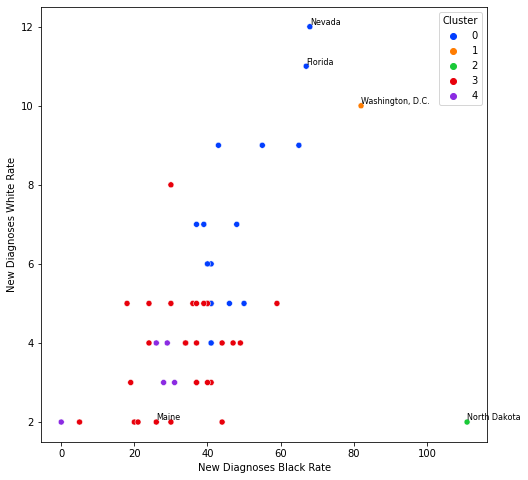

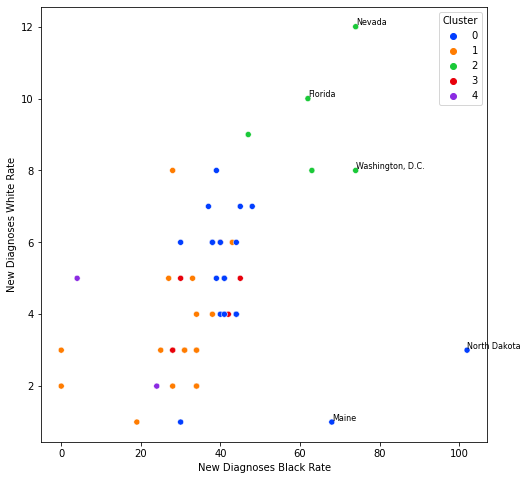

In [6]:
# yearly state dynamics
for year in range(2008, 2020):
    aux = data_preprocessing(df, year)
    plot_kmeans_clusters(aux, 5, "New Diagnoses Black Rate", "New Diagnoses White Rate", 
                         ["Washington, D.C.", "North Dakota", "Maine", "Florida", "Nevada"])